In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##벡터

### 백터 , 백터 전치

In [ ]:
 a = np.array([1,2,3]) ## 1차원 ndarray형은 항상 가로백터이다.
 print(a.shape)
print(a.T.shape)

(3,)
(3,)


In [ ]:
b = np.array([[1],[2]]) ## 2차원 배열, 세로백터 형태
print(b.shape) ## (2 x 1)
print(b.T.shape) ## (1 x 2) 

(2, 1)
(1, 2)


### 백터 덧셈

In [ ]:
a = np.array([2, 1]) ## 각 요소를 연산하는 것은 백터연산이다
b = np.array([1, 3]) ## 연산의 결과는 기하학적으로 a와 b를 변으로 하는 평행 사변형의 대각선이다.
print(a + b)

[3 4]


### 백터 뺄셈

In [ ]:
a = np.array([2, 1]) ## 연산의 결과는 기하학적으로 a와 -b를 변으로 하는 평행 사변형의 대각선이다.
b = np.array([1, 3]) 
print(a - b)

[ 1 -2]


### 스칼라의 곱셈

In [ ]:
a = np.array([2, 1]) ## 스칼라 값의 연산은 백터 요소 전체에 적용된다. 
print(2 * a) ## 기하학적으로 벡터의 크기가 스칼라 배가 된다.

[4 2]


### 내적

In [ ]:
b = np.array([1, 3])  ## 백터의 내적은 같은 차원을 가진 두 벡터에서 대응하는 요소를 곱한 뒤 더한 값이다.
c = np.array([4, 2])  ## 기하학적인 의미는 b백터를 c백터에 투영한 b'벡터의 길이를 c벡터의 길이를 곱해 합한 것이다.
print(b.dot(c))       ## |b| * |c| * cos세타의 의미이다. 
                      ## 즉 내적은 두 벡터의 유사성과 관련이 있는 연산입니다.
                        

10


### 벡터의 크기

In [ ]:
a = np.array([1,3])
print(np.linalg.norm(a)) 
print(np.sqrt(1*1 + 3*3))

3.1622776601683795
3.1622776601683795


In [ ]:
a = np.array([[1,2],[3,4]])
print(np.linalg.norm(a)) ## 원소 제곱해서 더해주는 함수?
print(np.sqrt(1*1 + 2*2 + 3*3 + 4*4))

5.477225575051661
5.477225575051661


##미분

### 합의 기호 시그마

특이점 : 벡터의 내적을 시그마로 표현 가능
따라서 시그마를 for문을 돌려서 처리하는 것보다 가능하면 내적으로 처리하는 것이 더 빠르다.

In [ ]:
a = np.ones(1000)
b = np.arange(1, 1001)
a.dot(b)

500500.0

### 곱의 기호

모든 요소를 다 곱한다.

### 미분

- 연쇄법칙 : 단계적으로 나누어 미분
- 편미분 : 편미분하는 변수에만 주목해서 미분 => gradient

경사를 그림으로 나타내기

In [ ]:
def f(w0, w1):                          ## f 정의
  return w0**2 + 2 * w0 * w1 +3          
def df_dw0(w0, w1):                     ## f의 w0에 대한 편미분
  return 2 * w0 + 2 * w1
def df_dw1(w0, w1):                     ## f의 w1에 대한 편미분
  return 2 * w0 + 0 * w1

In [ ]:
w_range = 2
dw = 0.25
w0 = np.arange(-w_range, w_range + dw, dw) ## -2부터 2.25 전까지 0.25간격으로 나누기 (2.25제외)
w1 = np.arange(-w_range, w_range + dw, dw) 
wn = w0.shape[0] ## w0의 요소 개수
ww0 , ww1 = np.meshgrid(w0, w1) ## w0와 w1으로 gird 만들기 (격자점 좌표 생성)
## ww0는 w0 행의 반복, ww1은 w1의 열을 행으로 반복 따라서 격자의 순서가 i, j 와 반대이다.
ff = np.zeros((len(w0), len(w1))) ## f값 저장할 벡터 만들기
dff_dw0 = np.zeros((len(w0), len(w1))) ## f를 w0로 미분한 값 저장할 벡터 만들기
dff_dw1 = np.zeros((len(w0), len(w1))) ## f를 w1로 미분한 값 저장할 벡터 만들기
for i0 in range(wn):
  for i1 in range(wn):
    ff[i1, i0] = f(w0[i0], w1[i1]) ## 격자의 순서가 반대이므로 값도 반대로 넣어줘야 한다.
    dff_dw0[i1, i0] = df_dw0(w0[i0], w1[i1])
    dff_dw1[i1, i0] = df_dw1(w0[i0], w1[i1])

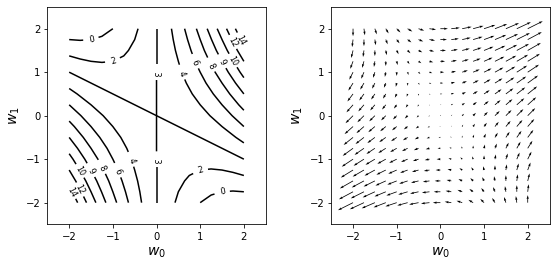

In [ ]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
cont = plt.contour(ww0, ww1, ff, 10, colors='k') ## 등고선 그래프 그리기, levels은 10이다.
cont.clabel(fmt='%2.0f', fontsize= 8) ## 등고선에 숫자 넣기
plt.xticks(range(-w_range, w_range + 1, 1)) ## 눈금 표시
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + 0.5)  ## 범위 지정
plt.ylim(-w_range - 0.5, w_range + 0.5)
plt.xlabel('$w_0$', fontsize= 14)  ## label표시
plt.ylabel('$w_1$', fontsize= 14)

plt.subplot(1,2,2)
plt.quiver(ww0, ww1, dff_dw0, dff_dw1) ## 2차원 평면에 scaled된 화살표 그린다. 여기에서는 gradient 그리기
## 좌표점 (ww0, ww1) 부터 방향 (dff_dw0, dff_dw1)의 화살표를 그린다.
plt.xlabel('$w_0$', fontsize= 14)
plt.ylabel('$w_1$', fontsize= 14)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + 0.5)
plt.ylim(-w_range - 0.5, w_range + 0.5)

plt.show()

다변수 중첩 함수의 미분
- f(g_0(w_0,w_1), g_1(w_0,w_1), g_2(w_0,w_1) .... g_m(w_0,w_1)) 을 미분하면 다음과 같다.
- Σ(∂f / ∂g_m) * (dg_m / dw) 

미분과 합의 기호의 교환
- 미분과 합의 기호(시그마)는 순서를 바꿀 수 있다.
- 미분을 먼저 계산하고 시그마를 계산하는 경우가 머신러닝에서 편한 경우가 많다.

## 행렬
백터는 행렬의 일종이다.(가로벡터 세로백터)

### 행렬의 덧셈, 뺄셈(같은 크기의 행렬만 가능)

In [ ]:
A = np.array([[1,2,3],[4,5,6]])  ##각 요소끼리 연산한다.
B = np.array([[7,8,9],[10,11,12]])
print(A+B)
print(A-B)

[[ 8 10 12]
 [14 16 18]]
[[-6 -6 -6]
 [-6 -6 -6]]


### 행렬의 스칼라 배

In [ ]:
A = np.array([[1,2,3],[4,5,6]]) ## 모든 요소에 스칼라를 곱한다.
print(2 * A)

[[ 2  4  6]
 [ 8 10 12]]


###행렬의 곱

In [ ]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print(A.dot(B)) ## 원래 내적계산은 행렬곱 연산이다. 크기만 맞추면 자동으로 세로벡터, 가로벡터로 변환한다.

32


In [ ]:
print(A * B) ## 그냥 대응되는 요소끼리 곱한다,

[ 4 10 18]


In [ ]:
A = np.array([[1, 2, 3],[-1, -2, -3]])
B = np.array([[4, -4],[5, -5],[6, -6]])
print(A.dot(B)) ## 행렬 곱 : (2 x 3) * (3 x 2)

[[ 32 -32]
 [-32  32]]


### 단위행렬

In [ ]:
np.identity(5) ## 정방행렬 + 대각선 하나만 1
               ## 요소는 float형이다.

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
I = np.identity(3)
print(A.dot(I)) ## 어떤 행렬에 단위행렬을 곱해도 그 행렬은 변하지 않는다.

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### 역행렬 
정수에서 역수와 동일한 의미로 곱하면 단위행렬이 되는 행렬이다. 단 정방행렬만 가능하다.

In [ ]:
A = np.array([[1, 2],[3, 4]])
invA = np.linalg.inv(A)  ##파이썬에서 역행렬 구하는 방법
print(invA) ##단 역행렬이 존재하지 않는 행렬도 있다.

[[-2.   1. ]
 [ 1.5 -0.5]]


### 전치

AB 행렬을 전치하면 B_T A_T 가 된다. (인덱스 순서를 바꾸는 효과)

In [ ]:
A = np.array([[1, 2, 3],[4, 5, 6]])
print(A)
print(A.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


### 행렬과 연립방정식

행렬 표시로 고치고 역행렬을 양변에 곱해서 XY값을 찾을수 있다. = > 한번에 많은 연립 방정식을 풀 때 편리하다.

### 행렬과 사상

- 벡터는 좌표하고 가정
- 행렬은 어떤 점을 다른 점으로 이동시키는 규칙
- 행렬은 선형 사상으로 분류된다.

## 지수함수와 로그함수

지수함수는 y = a**x이다. 
특징은 
- a>1이면 단조 증가
- 0<a<1이면 단조 감소
- 출력은 a>0이면 항상 양수이다.

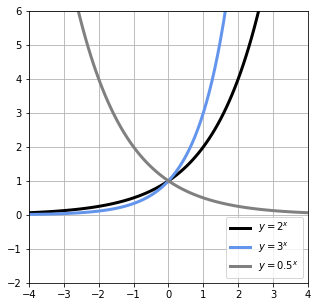

In [ ]:
x = np.linspace(-4, 4 ,100)
y = 2**x
y2 = 3**x
y3 = 0.5**x

plt.figure(figsize=(5,5))
plt.plot(x, y, 'black', linewidth = 3, label = '$y = 2^x$')
plt.plot(x, y2, 'cornflowerblue', linewidth = 3, label = '$y = 3^x$')
plt.plot(x, y3, 'gray', linewidth = 3, label = '$y = 0.5^x$')
plt.ylim(-2,6)
plt.xlim(-4,4)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

로그함수는 y = log(a)x이다. 특징은
- 지수함수의 역함수이다.
- y = x에서 y = a**x와 대칭이다.
- a>0에서만 정의된다
- x가 커지면 값은 증가하지만 기울기는 완만해진다.
- 너무 크거나 너무 작은수를 다루기 쉬운 크기로 rescale해주는 역할의 함수다.
- 곱셈을 덧셈으로 변환해준다. -> 가능도를 로그 가능도로 변환 or 미분하기 편리
- 지수함수의 최대 최소값을 취하는 값은 로그함수도 동일하다.

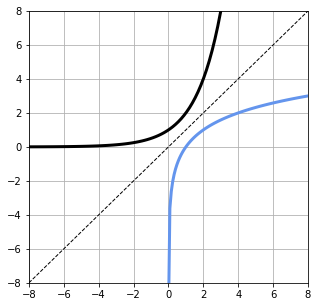

In [ ]:
x = np.linspace(-8, 8, 100)
y = 2**x

x2 = np.linspace(0.001, 8, 100) ## log(0)은 에러다. 그래서 제외해야 한다.
y2 = np.log(x2)/np.log(2) ## 밑이 2인 로그를 자연로그로 공식사용해서 만들기
plt.figure(figsize=(5,5))
plt.plot(x, y, 'black', linewidth = 3)
plt.plot(x2, y2, 'cornflowerblue', linewidth = 3)
plt.plot(x, x, 'black', linestyle='--', linewidth = 1)
plt.ylim(-8,8)
plt.xlim(-8,8)
plt.grid(True)
plt.show()

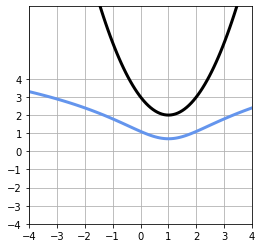

In [ ]:
x = np.linspace(-4, 4, 100)
y =(x-1)**2 +2 
logy = np.log(y)

plt.figure(figsize =(4,4))
plt.plot(x,y,'black',linewidth=3)
plt.plot(x, logy, 'cornflowerblue', linewidth=3)
plt.xticks(range(-4,9,1))
plt.yticks(range(-4,5,1))
plt.ylim(-4,8)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

### 지수 함수의 미분 

y = a ** x  
dx/dy = a**x * log (a)

특이점 a == e인 경우 함수의 형태는 변하지 않는다 => 미분 계산시 편리

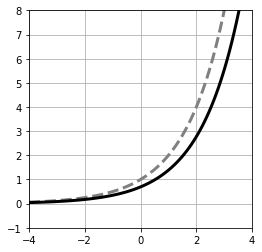

In [ ]:
x = np.linspace(-4, 4, 100)
a = 2
y = a**x
dy = np.log(a) * y

plt.figure(figsize= (4, 4))
plt.plot(x, y, 'gray', linestyle='--', linewidth=3)
plt.plot(x, dy, 'black', linewidth=3)
plt.ylim(-1,8)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

### 로그 함수의 미분

y = log(x)  
dy / dx = 1/x

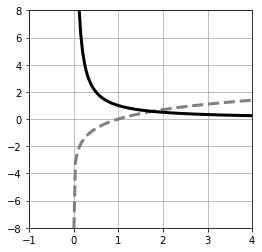

In [ ]:
x = np.linspace(0.0001, 4, 100) # 0이하로 정의 불가능
y = np.log(x)
dy = 1 / x

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'gray', linestyle='--', linewidth=3)
plt.plot(x, dy, 'black', linewidth=3)
plt.ylim(-8,8)
plt.xlim(-1,4)
plt.grid(True)
plt.show()

## 시그모이드 함수

y = 1 / ( 1 + e**(-x) )  
y = 1 / ( 1 + exp(-x) )

dy/dx = y(1-y)

특징
- 매끄러운 계단 모양
- 실수를 0~1까지로 변환시킨다.
- 확률을 나타낼 때 자주 사용

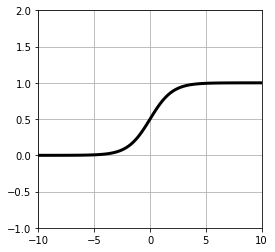

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'black', linewidth=3)

plt.ylim(-1, 2)
plt.xlim(-10, 10)
plt.grid(True)
plt.show()

##소프트맥스 함수

조건
- 기존 수(x)의 대소 관계 유지
- 기존 수를 확률로 변환
- 전부 더했을 때 1이 되어야 한다.

K 변수의 소프트 맥스 함수  
- $y_i = \frac{exp(x_i)} { \sum_{i=0}^{K-1} exp(x_i)}$
미분
- $\frac{∂y_j} {∂x_i} = y_j(I_{ij} - y_i)$  
단 $I$는 i = j일 때 1, i != j 일 때 0이다. 

In [ ]:
def softmax(x0, x1, x2):
  u = np.exp(x0) + np.exp(x1) + np.exp(x2)
  return np.exp(x0) / u, np.exp(x1) / u, np.exp(x2) / u
y = softmax(2, 1, -1)
print(np.round(y, 2))
print(np.sum(y))

[0.71 0.26 0.04]
1.0


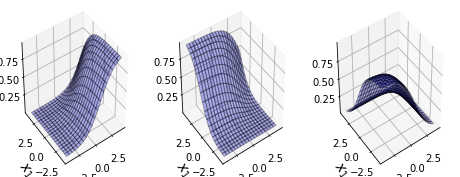

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

xn = 20 ##갯수
x0 = np.linspace(-4, 4, xn)
x1 = np.linspace(-4, 4, xn)

y = np.zeros((xn, xn, 3))
for i0 in range(xn):
  for i1 in range(xn):
    y[i1, i0, :] =softmax(x0[i0], x1[i1], 1) ## x2고정해서 y에 넣기

xx0, xx1 = np.meshgrid(x0, x1)
plt.figure(figsize=(8, 3))
for i in range(3):
  ax = plt.subplot(1, 3, i+1, projection='3d')
  ax.plot_surface(xx0, xx1, y[:,:,i], rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')
  ax.set_xlabel('$x_0$', fontsize=14)
  ax.set_ylabel('$x_1$', fontsize=14)
  ax.view_init(40, -125)
plt.show()


## 소프트맥스 함수와 시그모이드 함수

0dds 개념
- http://www.incodom.kr/Odds_ratio


로짓, 시그모이드, 소프트맥스 유도
- https://cjw0107.tistory.com/7


- 로짓(logit) : odds를 자연로그 취한 값
 - 실패확률에 대한 성공 확률의 비(연관성)를 자연로그 취한 값
- 시그모이드(sigmoid) : 로짓의 역함수 관계
 - x값을 0~1 값으로 변환시켜준다.
 - 로짓의 성공확률(원하는 클래스 분류 확률)을 뽑아준다.
- 소프트맥스(softmax) : k개의 클래스 구분 결과를 확률처럼 해석
 - 시그모이드를 k개의 클래스로 일반화


## 가우스 함수

- 가우스 분포를 나타내는 함수로 주로 기저함수로 사용된다.
- 기본 형태
 - $y = exp(-x^2)$
- 일반 형태
 - $y = αexp(- \frac{(x-μ)^2} {σ^2})$
 - α: 높이, μ : 평균, σ: 표준편차
- 확률 분포를 나타내는 형태(x에 대한 적분이 1이 되어야 한다.)
 -  $α = \frac{1} {(2πσ^2)^{1/2}}$

<function matplotlib.pyplot.show>

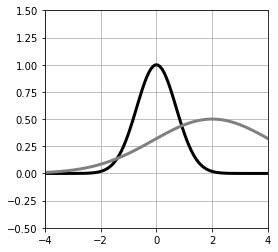

In [ ]:
def gauss(mu, sigma, a):
  return a * np.exp(-(x - mu)**2 / sigma**2)

x = np.linspace(-4, 4, 100)
plt.figure(figsize=(4, 4))
plt.plot(x, gauss(0, 1, 1), 'black', linewidth=3)
plt.plot(x, gauss(2, 3, 0.5), 'gray', linewidth=3)
plt.ylim(-.5, 1.5)
plt.xlim(-4, 4)
plt.grid(True)
plt.show

## 2차원 가우스 함수

- 기본 형태
 - $y = exp\{-(x_0^2 + x_1^2)\}$
- 일반 형태
 - $y = αexp\{(- \frac{1} {2} (x-μ)^T Σ^{-1} (x - μ)\}$
 - μ : 평균 백터, Σ: 공분산 행렬
- 확률 분포를 나타내는 형태(x에 대한 적분이 1이 되어야 한다.)
 - α : $\frac{1} {2π} \frac{1} {|Σ|{^{1/2}}}$

공분산 행렬
- 형태 (분산, 공분산 조합)
  - i = j : 분산,  i != j : 공분산
- 공분산(covariance) 정의 : 두개의 확률변수의 분포가 결합된 결합 확률분포의 분산
 - 방향성은 나타내지만 결합 정도에 대한 정보는 유용 x
 - 공분산 > 0 두 변수는 같은 방향으로 움직임
 - 공분산 < 0 두 변수는 다른 방향으로 움직임 
 - 공분산 = 0 두 변수는 독립적일수 있다 (항상은 아님)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def gauss(x, mu, sigma):
  N, D = x.shape
  c1 = 1 / (2 * np.pi)**(D / 2) ## 여기에서 D / 2 로 제곱하는 이유?? 
  c2 = 1 / (np.linalg.det(sigma)**(1 / 2)) ## np.linalg.det()는 행렬의 ad-bc를 계산해준다.(역행렬 존재여부)&&(행렬의 크기)
  inv_sigma = np.linalg.inv(sigma) ##역행렬 계산
  c3 = x - mu 
  c4 = np.dot(c3, inv_sigma)
  c5 = np.zeros(N)
  for d in range(D):
    c5 = c5 + c4[:, d] * c3[:, d]
  p = c1 * c2 * np.exp(-c5 / 2)
  return p  

In [ ]:
def gauss_(x, mu, sigma):
  N, D = x.shape
  c1 = 1 / (2 * np.pi)**(D / 2) ## 여기에서 D / 2 로 제곱하는 이유?? 
  c2 = 1 / (np.linalg.det(sigma)**(1 / 2)) ## np.linalg.det()는 행렬의 ad-bc를 계산해준다.(역행렬 존재여부)&&(행렬의 크기)
  inv_sigma = np.linalg.inv(sigma) ##역행렬 계산
  c3 = x - mu 
  c4 = np.dot(c3, inv_sigma)
  c5 = np.dot(c4, c3.T)
  p = c1 * c2 * np.exp(-c5 / 2)
  return p 

In [ ]:
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))
print(gauss_(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]
[[0.15915494 0.15915494 0.15915494]
 [0.15915494 0.05854983 0.15915494]
 [0.15915494 0.15915494 0.00291502]]


In [ ]:
a=gauss(x, mu, sigma)
a
a = a.reshape(3, 3)

ValueError: ignored

In [ ]:
gauss_(x, mu, sigma)

In [ ]:
a

이거 결과값이 위 처럼 3x3행렬로 나와야하는데 왜 1x3행렬로 나오게 뽑는지?  

In [ ]:
X_range0 = [-3, 3]
X_range1 = [-3, 3]

def show_contour_gauss(mu, sig):
  xn = 40
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] ## x.T구현
  f = gauss(x, mu, sig)
  f = f.reshape(xn, xn)
  f = f.T ## xx0와 xx1의 순서에 맞게 설정
  cont = plt.contour(xx0, xx1, f, 15, colors='k')
  plt.grid(True)

def show3d_gauss(ax, mu, sig):
  xn = 40
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 'F')]
  f = gauss(x, mu, sig)
  f = f.reshape(xn, xn)
  f = f.T
  ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3, color='blue', edgecolor='black')

mu = np.array([1, 0.5])
sigma = np.array([[2, 1],[1, 1]])
Fig = plt.figure(1, figsize=(7, 3))
Fig.add_subplot(1, 2, 1)
show_contour_gauss(mu, sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$', fontsize=14)
plt.xlabel('$x_1$', fontsize=14)
Ax = Fig.add_subplot(1, 2, 2, projection = '3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()